<div align="center">

<a href=https://colab.research.google.com/drive/1Dsmby5O4RDW_qynJpMUTMiLIud3ier0B target="_blank">
    
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

</div>


<h1 align="center"> 5 Flower Types Classification Dataset </h1>


The **5 Flower Types Classification Dataset** is a collection of images belonging to five different flower classes: Lilly, Lotus, Sunflower, Orchid, and Tulip. Each flower class contains 1000 images, resulting in a total of 5000 images in the dataset.

This dataset is suitable for training and evaluating a multi-class Convolutional Neural Network (CNN) model to classify flower images into one of the five mentioned classes. The goal of the classification task is to accurately identify the type of flower from an input image.

The dataset can be used to explore various deep learning techniques for image classification, such as data augmentation, transfer learning, and model fine-tuning. It provides a challenging task due to the visual similarity and subtle differences among different flower types.

Dataset Details:
- Number of classes: 5
- Total images: 5000 (1000 images per class)
- Image format: JPG or PNG
- Image resolution: Varies (please preprocess the images to a consistent size if required)

The 5 Flower Types Classification Dataset is a valuable resource for researchers, students, and practitioners interested in the field of computer vision, specifically in image classification tasks. It can be used for educational purposes, benchmarking different models, and advancing the state-of-the-art in flower classification.

Feel free to download the dataset and start exploring the fascinating world of flower image classification!:
https://www.kaggle.com/datasets/kausthubkannan/5-flower-types-classification-dataset

<img src="Baseline Model.jpg" height=250 width=250 />

<h1 align="center"> The Essence of Transfer Learning </h1>

* Transfer learning, a pivotal concept in AI, empowers models to leverage knowledge from one task and apply it to another. By drawing inspiration from human learning, this approach has redefined machine learning. Instead of starting from scratch for each task, models are pre-trained on vast datasets and then fine-tuned for specific applications, saving time and resources.

* In the realm of computer vision, advanced models such as ResNet exhibit exceptional proficiency in image comprehension, enabling them to excel in tasks like medical image analysis and autonomous vehicle navigation. However, the field faces its own set of challenges, including issues like negative transfer and bias amplification, underscoring the importance of careful and considerate implementation strategies.

* The future of transfer learning is bright, with ongoing research focusing on
enhancing adaptability and reducing fine-tuning requirements. As AI continues to evolve, transfer learning remains a cornerstone, propelling us toward a future where machines seamlessly learn, adapt, and revolutionize industries.




In [1]:
# import libraries
import os
import shutil
import random
import numpy as np
import pandas as pd
import datetime
from matplotlib import pyplot as plt
from PIL import Image
from sklearn.metrics import (accuracy_score, 
                             classification_report,
                             confusion_matrix)
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import (Conv2D, MaxPool2D,
                                     Flatten, Dense, Dropout)
from tensorflow.keras import Sequential
import tensorflow_hub as hub
os.environ['KAGGLE_CONFIG_DIR'] = '/content'
BATCH_SIZE = 32
LEARNING_RATE = 0.0001
TARGET_SIZE = (256, 256)

# Downloading and preparing data for model

In [2]:
!kaggle datasets download -d kausthubkannan/5-flower-types-classification-dataset

 97% 235M/242M [00:02<00:00, 71.9MB/s]
100% 242M/242M [00:03<00:00, 82.2MB/s]


In [3]:
!unzip \*.zip && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: flower_images/Lilly/00048a5c76.jpg  
  inflating: flower_images/Lilly/001ff6644e.jpg  
  inflating: flower_images/Lilly/001ff6656j.jpg  
  inflating: flower_images/Lilly/00973ad1b1.jpg  
  inflating: flower_images/Lilly/00a7d512d6.jpg  
  inflating: flower_images/Lilly/00f36a3c40.jpg  
  inflating: flower_images/Lilly/013628cccc.jpg  
  inflating: flower_images/Lilly/01998d6fb5.jpg  
  inflating: flower_images/Lilly/01a0ec319c.jpg  
  inflating: flower_images/Lilly/01b4bb0289.jpg  
  inflating: flower_images/Lilly/025ef3ea44.jpg  
  inflating: flower_images/Lilly/02a7a2df46.jpg  
  inflating: flower_images/Lilly/02be2ca388.jpg  
  inflating: flower_images/Lilly/035cce082f.jpg  
  inflating: flower_images/Lilly/039eba79d4.jpg  
  inflating: flower_images/Lilly/04067b91d6.jpg  
  inflating: flower_images/Lilly/04acfd5449.jpg  
  inflating: flower_images/Lilly/05777790e2.jpg  
  inflating: flower_images/Lilly/05b341b09f.jpg  

In [4]:
!pip install split-folders

In [5]:
import splitfolders

In [6]:
src_dir = '/content/flower_images'
dst_dir = '/content/Data'

## Data preprocessing (image augmentation)

In [7]:
splitfolders.ratio(input=src_dir, output=dst_dir, ratio=(0.6, 0.2, 0.2))

Copying files: 5000 files [00:01, 4643.77 files/s]


In [8]:
for dpath, dname, filename in os.walk("Data"):
  print(f"looking at {dpath} found {dname} folders files availeble {len(filename)}")

looking at Data found ['train', 'val', 'test'] folders files availeble 0
looking at Data/train found ['Sunflower', 'Orchid', 'Tulip', 'Lilly', 'Lotus'] folders files availeble 0
looking at Data/train/Sunflower found [] folders files availeble 600
looking at Data/train/Orchid found [] folders files availeble 600
looking at Data/train/Tulip found [] folders files availeble 600
looking at Data/train/Lilly found [] folders files availeble 600
looking at Data/train/Lotus found [] folders files availeble 600
looking at Data/val found ['Sunflower', 'Orchid', 'Tulip', 'Lilly', 'Lotus'] folders files availeble 0
looking at Data/val/Sunflower found [] folders files availeble 200
looking at Data/val/Orchid found [] folders files availeble 200
looking at Data/val/Tulip found [] folders files availeble 200
looking at Data/val/Lilly found [] folders files availeble 200
looking at Data/val/Lotus found [] folders files availeble 200
looking at Data/test found ['Sunflower', 'Orchid', 'Tulip', 'Lilly', 

In [9]:
print("Training Images.")
train_datagen = ImageDataGenerator(rescale=1/255., rotation_range=0.2,
                                  #  brightness_range=(0.2, 0.5),
                                   zoom_range=0.2, shear_range=0.2,
                                   horizontal_flip=True)
train_dataset = train_datagen.flow_from_directory('/content/Data/train',
                                                  target_size=TARGET_SIZE,
                                                  batch_size=BATCH_SIZE,
                                                  shuffle=True)
print("Validation Images")
val_datagen = ImageDataGenerator(rescale=1/255.)
val_dataset = val_datagen.flow_from_directory('/content/Data/val',
                                              target_size=TARGET_SIZE,
                                              batch_size=BATCH_SIZE,
                                              shuffle=False)

print("Testing Images.")
test_datagen = ImageDataGenerator(rescale=1/255.)
test_dataset = test_datagen.flow_from_directory('/content/Data/test',
                                                target_size=TARGET_SIZE,
                                                batch_size=BATCH_SIZE,
                                                shuffle=False)

Training Images.
Found 3000 images belonging to 5 classes.
Validation Images
Found 1000 images belonging to 5 classes.
Testing Images.
Found 1000 images belonging to 5 classes.


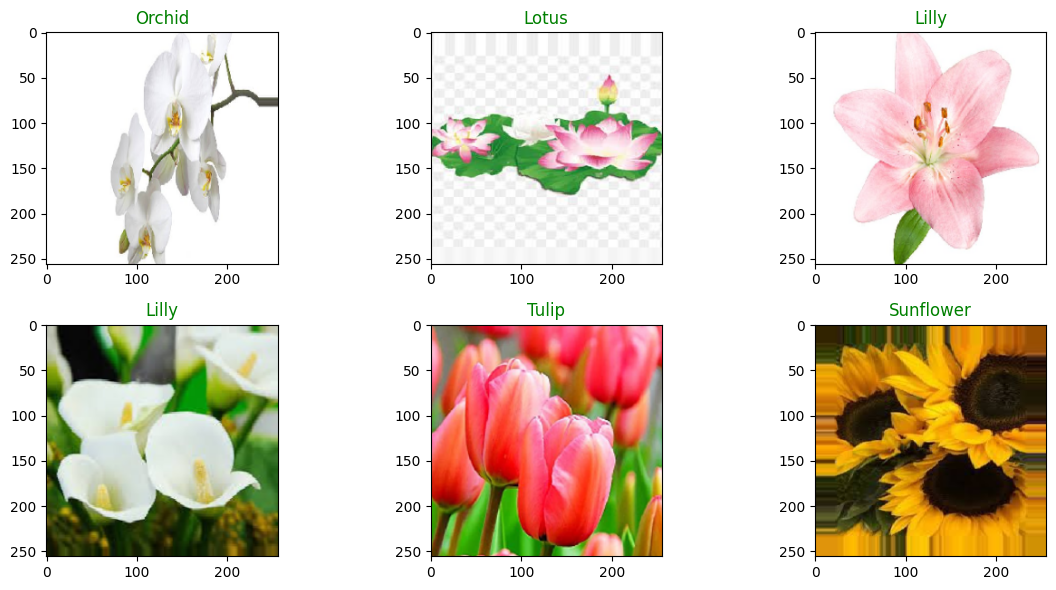

In [10]:
images, labels = next(train_dataset)
labels = np.argmax(labels, axis=1)
class_names = list(train_dataset.class_indices.keys())
def plot_random_images(images, labels, class_names):
    plt.figure(figsize=(12, 6))

    for i in range(6):
        ax = plt.subplot(2, 3, i+1)
        rand_index = random.choice(range(len(images)))
        plt.imshow(images[rand_index])
        plt.title(class_names[labels[rand_index]], color='green', fontsize=12)

    plt.tight_layout()
    plt.show()

plot_random_images(images, labels, class_names)

## Baseline Model

In [11]:
baseline_model = Sequential([

                    Conv2D(filters=16, kernel_size=(3,3), strides=1,
                           activation='relu', input_shape=(256, 256, 3)),
                    MaxPool2D(pool_size=(2,2), strides=2, padding='valid'),

                    Conv2D(filters=32, kernel_size=(3,3), strides=2,
                           activation='relu'),
                    MaxPool2D(pool_size=(2,2), strides=1, padding='same'),

                    Conv2D(filters=64, kernel_size=(3,3), strides=2,
                           activation='relu'),
                    MaxPool2D(pool_size=(2,2), strides=1, padding='same'),

                    Flatten(),
                    Dense(256, activation='relu'),
                    Dense(128, activation='relu'),
                    Dense(64, activation='relu'),
                    Dense(5, activation='softmax')

])

In [12]:
early_stop = EarlyStopping(monitor="val_loss", patience=5)

In [13]:
baseline_model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),
                       loss=tf.keras.losses.CategoricalCrossentropy(),
                       metrics=['accuracy'])

In [14]:
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 63, 63, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 64)       0

In [15]:
baseline_model_history = baseline_model.fit(train_dataset, epochs=20,
                                            validation_data=(val_dataset),
                                            callbacks=[early_stop])

Epoch 1/20
94/94 [==============================] - 67s 563ms/step - loss: 1.3815 - accuracy: 0.4023 - val_loss: 1.2391 - val_accuracy: 0.4720
Epoch 2/20
94/94 [==============================] - 54s 572ms/step - loss: 1.1757 - accuracy: 0.4997 - val_loss: 1.1182 - val_accuracy: 0.5580
Epoch 3/20
94/94 [==============================] - 52s 557ms/step - loss: 1.0739 - accuracy: 0.5660 - val_loss: 1.0302 - val_accuracy: 0.6010
Epoch 4/20
94/94 [==============================] - 51s 544ms/step - loss: 1.0156 - accuracy: 0.5853 - val_loss: 1.0972 - val_accuracy: 0.5630
Epoch 5/20
94/94 [==============================] - 51s 544ms/step - loss: 0.9681 - accuracy: 0.6127 - val_loss: 0.9564 - val_accuracy: 0.6240
Epoch 6/20
94/94 [==============================] - 51s 546ms/step - loss: 0.9110 - accuracy: 0.6513 - val_loss: 0.9783 - val_accuracy: 0.5930
Epoch 7/20
94/94 [==============================] - 52s 555ms/step - loss: 0.8733 - accuracy: 0.6500 - val_loss: 1.0077 - val_accuracy: 0.6250

In [16]:
def plot_predictions(loss_df, title):
    """
    Plots the training and validation loss, as well as training and validation
    accuracy, over epochs for a given dataset.

    Parameters:
    loss_df (pandas.DataFrame): A DataFrame containing loss and accuracy values
                                for both training and validation sets over
                                epochs.Columns should include 'loss', 'val_loss'
                                'accuracy', and 'val_accuracy'.
    title (str): Title for the entire plot.

    Returns:
    None (Displays the plot with loss and accuracy curves)
    """
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))

    ax[0].plot(loss_df['loss'], color='red', marker='o',
               label='Train Loss')
    ax[0].plot(loss_df['val_loss'], color='blue', marker='*',
               label='Val Loss')

    ax[0].set_title('Loss over epochs')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    ax[0].legend()

    ax[1].plot(loss_df['accuracy'], color='red', marker='o',
               label='Train Accuracy')
    ax[1].plot(loss_df['val_accuracy'], color='blue', marker='*',
               label='Val Accuracy')

    ax[1].set_title('Accuracy over epochs')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend()

    fig.suptitle(title, fontsize=16)
    plt.show()

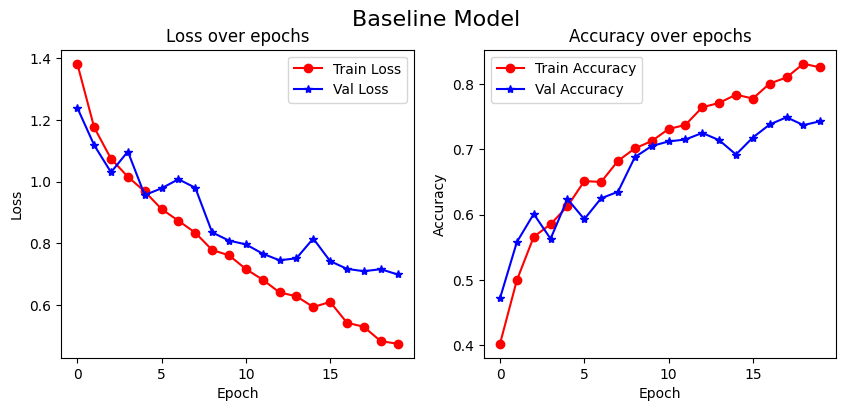

In [17]:
loss_df = pd.DataFrame(baseline_model_history.history)
plot_predictions(loss_df, title="Baseline Model")

In [18]:
def create_tensorboard_callback(dir_name, experiment_name):
    """
    Creates a TensorBoard callback for tracking training progress and
    visualizing metrics.

    Parameters:
    dir_name (str): The base directory where TensorBoard logs will be stored.
    experiment_name (str): A unique name for the experiment, used to create a
    subdirectory within dir_name.

    Returns:
    tf.keras.callbacks.TensorBoard: A TensorBoard callback instance configured
    with the appropriate log directory.
    """
    log_dir = (dir_name + "/" + experiment_name + "/" + 
               datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
    return tensorboard_callback


In [19]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [20]:
def create_model(model_url, num_classes):
  """
  Creates a Keras model for transfer learning using a pre-trained feature
  extraction layer from TensorFlow Hub.

  Parameters:
      model_url (str): The URL of the pre-trained model from TensorFlow Hub that
      will be used as the feature extraction layer.This model should be
      compatible with KerasLayer.
      num_classes (int, optional): The number of classes for the final
      classification layer. Default is 5.
      TARGET_SIZE (tuple, optional): The target input image size expected by the
      model's feature extraction layer.It's represented as a tuple of two
      integers (height, width). Default is (256, 256).

  Returns:
      A Keras Sequential model with the following structure:
          1. A KerasLayer with the pre-trained feature extraction model from
          TensorFlow Hub.
          2. A Dense layer with softmax activation for final classification.

  """
  feature_extraction_layer = hub.KerasLayer(model_url, trainable=False,
                                            name="feature_extraction_layer",
                                            input_shape= TARGET_SIZE + (3,))
  model = Sequential([
      feature_extraction_layer,
      Dense(num_classes, activation="softmax", name='output_ayer')
  ])
  return model

In [21]:
resnet_model = create_model(resnet_url, num_classes=train_dataset.num_classes)

In [22]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 2048)             23564800  
 erasLayer)                                                      
                                                                 
 output_ayer (Dense)         (None, 5)                 10245     
                                                                 
Total params: 23,575,045
Trainable params: 10,245
Non-trainable params: 23,564,800
_________________________________________________________________


In [23]:
resnet_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                     optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                     metrics=["accuracy"])

In [25]:
resnet_history = resnet_model.fit(train_dataset, epochs=20,
                                  callbacks = [create_tensorboard_callback(
                                                  dir_name="tensorflow_hub",
                                                  experiment_name="Resnet50V2"
                                              )],
                                  validation_data=val_dataset
                                 )

Epoch 1/20
94/94 [==============================] - 64s 607ms/step - loss: 1.5424 - accuracy: 0.3423 - val_loss: 1.2940 - val_accuracy: 0.4750
Epoch 2/20
94/94 [==============================] - 56s 593ms/step - loss: 1.1369 - accuracy: 0.5683 - val_loss: 1.0104 - val_accuracy: 0.6370
Epoch 3/20
94/94 [==============================] - 55s 582ms/step - loss: 0.9127 - accuracy: 0.6957 - val_loss: 0.8442 - val_accuracy: 0.7300
Epoch 4/20
94/94 [==============================] - 54s 571ms/step - loss: 0.7827 - accuracy: 0.7523 - val_loss: 0.7422 - val_accuracy: 0.7580
Epoch 5/20
94/94 [==============================] - 55s 587ms/step - loss: 0.6969 - accuracy: 0.7883 - val_loss: 0.6738 - val_accuracy: 0.7860
Epoch 6/20
94/94 [==============================] - 55s 588ms/step - loss: 0.6287 - accuracy: 0.8130 - val_loss: 0.6197 - val_accuracy: 0.8130
Epoch 7/20
94/94 [==============================] - 54s 568ms/step - loss: 0.5887 - accuracy: 0.8247 - val_loss: 0.5797 - val_accuracy: 0.8270

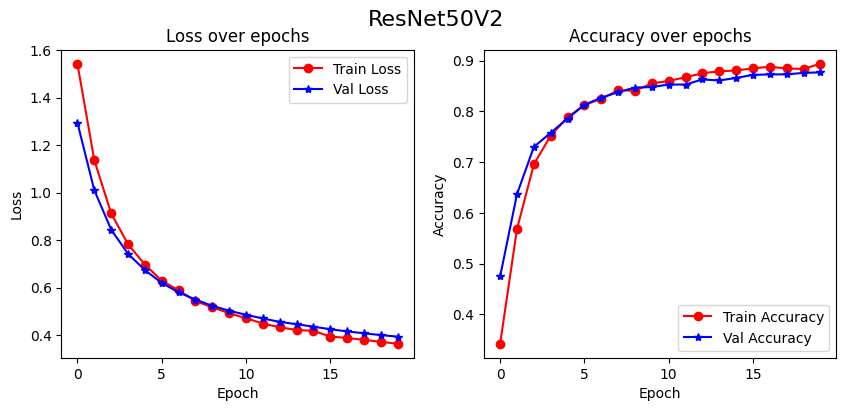

In [26]:
loss_df = pd.DataFrame(resnet_history.history)
plot_predictions(loss_df, title="ResNet50V2")

In [27]:
efficientnet_model = create_model(model_url=efficientnet_url,
                                  num_classes=train_dataset.num_classes)

In [28]:
efficientnet_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                     optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                     metrics=["accuracy"])

In [29]:
effecientnet_history = efficientnet_model.fit(train_dataset, epochs=20,
                                callbacks = [create_tensorboard_callback(
                                                  dir_name="tensorflow_hub",
                                                  experiment_name="Effecientnet"
                                              )],
                                  validation_data=val_dataset
                                             )

Epoch 1/20
94/94 [==============================] - 67s 588ms/step - loss: 1.5451 - accuracy: 0.3257 - val_loss: 1.4065 - val_accuracy: 0.4480
Epoch 2/20
94/94 [==============================] - 54s 574ms/step - loss: 1.2521 - accuracy: 0.6113 - val_loss: 1.1632 - val_accuracy: 0.6470
Epoch 3/20
94/94 [==============================] - 53s 562ms/step - loss: 1.0557 - accuracy: 0.7237 - val_loss: 0.9943 - val_accuracy: 0.7200
Epoch 4/20
94/94 [==============================] - 54s 579ms/step - loss: 0.9111 - accuracy: 0.7780 - val_loss: 0.8757 - val_accuracy: 0.7680
Epoch 5/20
94/94 [==============================] - 53s 561ms/step - loss: 0.8144 - accuracy: 0.7997 - val_loss: 0.7893 - val_accuracy: 0.7920
Epoch 6/20
94/94 [==============================] - 54s 572ms/step - loss: 0.7420 - accuracy: 0.8210 - val_loss: 0.7225 - val_accuracy: 0.8090
Epoch 7/20
94/94 [==============================] - 52s 551ms/step - loss: 0.6791 - accuracy: 0.8243 - val_loss: 0.6712 - val_accuracy: 0.8170

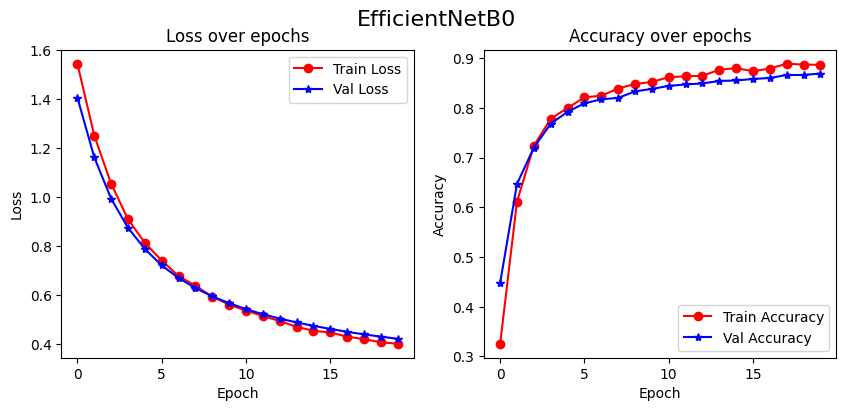

In [30]:
loss_df = pd.DataFrame(effecientnet_history.history)
plot_predictions(loss_df, title="EfficientNetB0")

# making predictions

In [41]:
baseline_prediction = np.argmax(baseline_model.predict(test_dataset),
                                axis=1)
resnet_prediction = np.argmax(resnet_model.predict(test_dataset),
                              axis=1)
efficientnet_prediction = np.argmax(efficientnet_model.predict(test_dataset),
                                    axis=1)
y_true = test_dataset.labels

32/32 [==============================] - 5s 122ms/step


In [42]:
print(f"Baseline Accuracy: {accuracy_score(baseline_prediction, y_true)}")
print(f"Resnet50 V2 Accuracy: {accuracy_score(resnet_prediction, y_true)}")
print(f"EfficientNetB0 Accuracy: {accuracy_score(efficientnet_prediction, y_true)}")

Baseline Accuracy: 0.728
Resnet50 V2 Accuracy: 0.874
EfficientNetB0 Accuracy: 0.876


In [48]:
def plot_confusion_matrix(y_true, predictions, class_names, title):

    cm = confusion_matrix(y_true, predictions)
    plt.figure(figsize=(8, 6))
    heatmap = plt.imshow(cm, cmap='Blues')

    # Set axis labels and title
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)

    # Set xticks and yticks with class names
    tick_labels = class_names
    plt.xticks(ticks=np.arange(len(class_names)),
               labels=tick_labels, rotation=45)
    plt.yticks(ticks=np.arange(len(class_names)),
               labels=tick_labels)

    # Add numbers to the heatmap cells
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            plt.text(j, i, str(cm[i, j]),
                     ha='center', va='center', color='black')

    plt.colorbar(heatmap)
    plt.show()

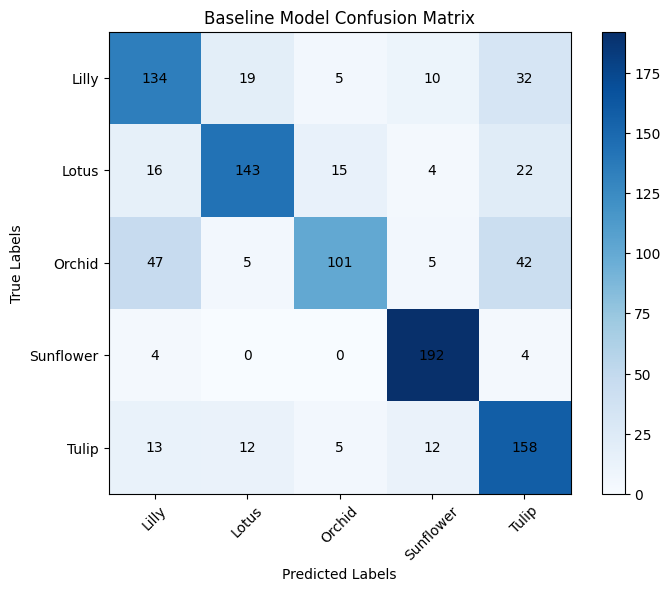

In [49]:
plot_confusion_matrix(y_true, baseline_prediction,
                      class_names,
                      title="Baseline Model Confusion Matrix")

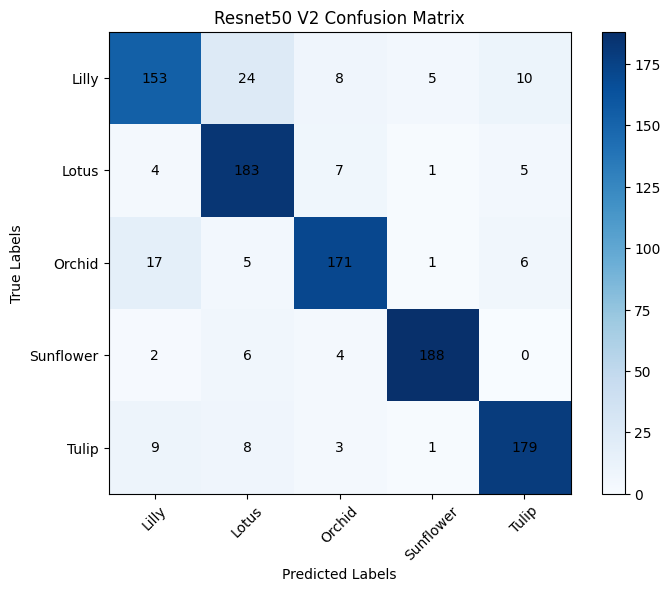

In [50]:
plot_confusion_matrix(y_true, resnet_prediction,
                      class_names,
                      title="Resnet50 V2 Confusion Matrix")

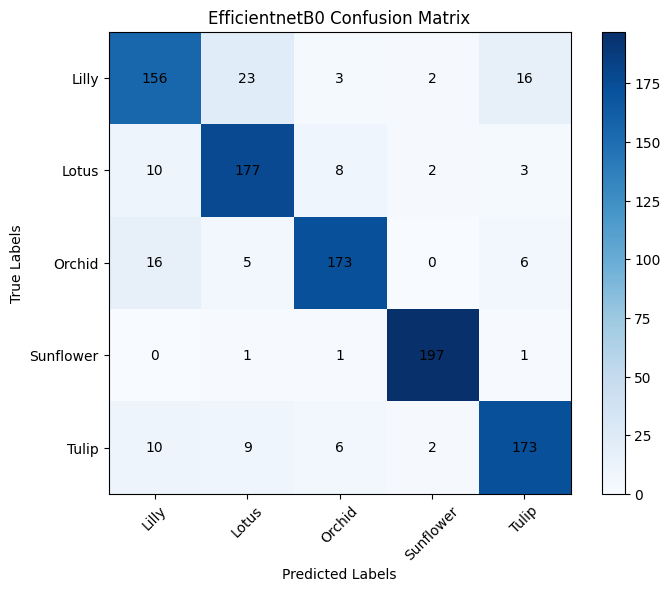

In [51]:
plot_confusion_matrix(y_true, efficientnet_prediction,
                      class_names,
                      title="EfficientnetB0 Confusion Matrix")

In [59]:
def plot_random_images(model, val_data, classes):

    images = []
    labels = []
    for _ in range(len(val_data)):
        batch_images, batch_labels = next(val_data)
        images.extend(batch_images)
        labels.extend(batch_labels)

    # Shuffle the images and labels together
    combined = list(zip(images, labels))
    random.shuffle(combined)
    images, labels = zip(*combined)
    labels = np.argmax(labels, axis=1)
    plt.figure(figsize=(10, 6))
    for i in range(6):
        ax = plt.subplot(2, 3, i + 1)
        rand_index = random.choice(range(len(images)))
        target_image = images[rand_index]
        pred_probs = model.predict(tf.expand_dims(target_image, axis=0), verbose=0)
        pred_label = classes[pred_probs.argmax()]
        true_label = classes[labels[rand_index]]

        plt.imshow(target_image)

        if pred_label == true_label:
            color = "green"
        else:
            color = "red"

        plt.title("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                        100 * tf.reduce_max(pred_probs),
                                                        true_label),
                  color=color, fontsize=10)

    plt.tight_layout()
    plt.show()

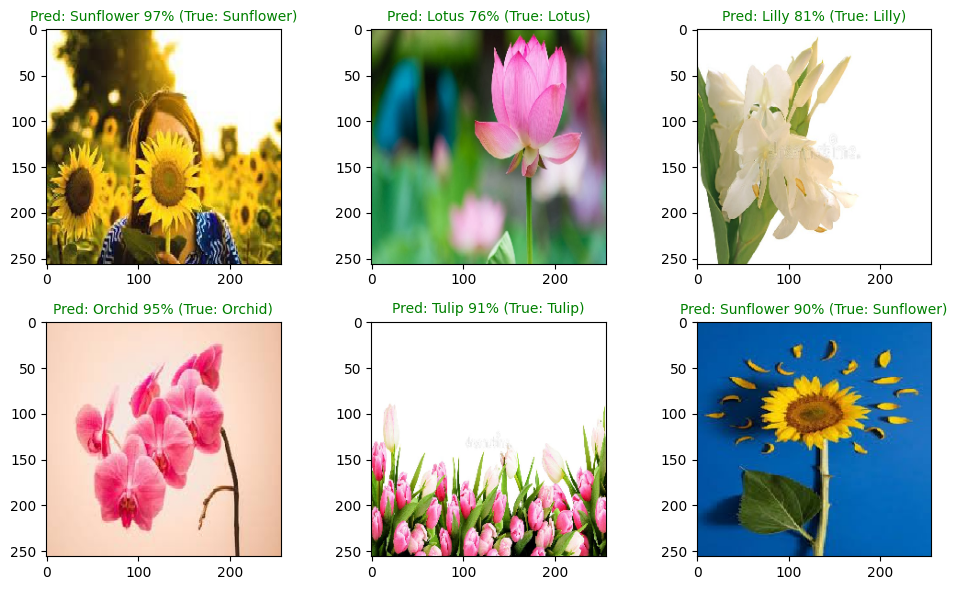

In [60]:
plot_random_images(efficientnet_model, test_dataset, class_names)

## Thank You ✌️